# Evaulate the result with different hyperparameters

In [42]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# confusion matrix
from sklearn.metrics import confusion_matrix

In [30]:
# Load the results 
# calulate how many animal species are in the results
# calculate the average number of animals per image

# Load the results

df_train = pd.read_csv('~/animl-implement/result/0222/20230222_021024/outputs_train.csv')
df_train.head()

df_val = pd.read_csv('~/animl-implement/result/0222/20230222_021024/outputs_val.csv')
df_val.head()

df_test = pd.read_csv('~/animl-implement/result/0222/20230222_021024/outputs_test.csv')
df_test.head()


,path,label,weight,bird,fox,lizard,rodent,skunk
0,dataset1/X8114541/p_000198_2798d7d76a008079a7a...,fox,0.539418,3.038287e-15,1.000000,1.541825e-18,1.485836e-14,1.996866e-20
1,dataset1/X8114541/p_000195_c67fcdced01f3972a70...,fox,0.539418,1.376990e-16,1.000000,6.461523e-20,1.113191e-15,2.378829e-21
2,dataset1/X8114541/p_000196_bed2ba2e6e7cfbb21ba...,fox,0.539418,5.376797e-11,1.000000,1.564267e-13,4.731601e-12,1.613153e-13
3,dataset1/X8114541/p_000210_c3c6fe41bac74129d9c...,fox,0.539418,6.721402e-04,0.969106,1.903491e-03,3.833143e-04,2.793487e-02
4,dataset1/X8114541/p_000193_4c2d71a9a583d746449...,fox,0.539418,1.232633e-07,1.000000,2.968463e-09,3.047989e-09,1.780923e-10


In [31]:
df = pd.concat([df_train, df_val, df_test])
df.head()

,path,label,weight,bird,fox,lizard,rodent,skunk
0,dataset1/X811480B/p_000232_5416f9c75606bc2093d...,fox,0.768660,1.330003e-14,1.000000,5.619855e-17,9.253115e-15,3.150770e-17
1,dataset1/X811480B/p_000230_7d5ceeb53e8005c3402...,fox,0.768660,3.278565e-09,1.000000,7.435326e-12,2.199840e-13,3.103492e-12
2,dataset1/X811480B/p_000372_c78c93a541ae0475f2e...,fox,0.768660,1.693232e-13,1.000000,1.881097e-15,7.300760e-14,2.338386e-22
3,dataset1/X811480B/p_000373_cca1bf9d54a27dc9996...,fox,0.768660,1.599664e-11,1.000000,3.949020e-13,1.200667e-10,1.041570e-15
4,dataset1/X811480B/p_000582_e6e45cc4e3a11ca78dc...,bird,0.619698,8.839586e-01,0.001933,1.005150e-03,1.130881e-01,1.484074e-05


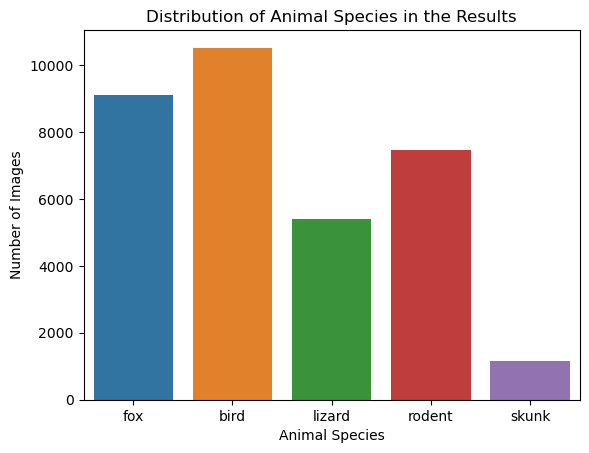

In [41]:
df['label'].value_counts()

#plot the species distribution in the results
sns.countplot(x='label', data=df)
# add labels and species numbers

plt.xlabel('Animal Species')
plt.ylabel('Number of Images')
plt.title('Distribution of Animal Species in the Results')
plt.show()

# imbalance in the species distribution

In [55]:
len(df_train)

19474

In [ ]:
df_train['pred'] = df_train.iloc[:, 3:-1].idxmax(axis=1)

In [61]:
# pred the species with the highest probability
df_val['pred'] = df_val.iloc[:, 3:].idxmax(axis=1)
df_test['pred'] = df_test.iloc[:, 3:].idxmax(axis=1)

In [63]:
df_val['pred'].value_counts()

bird      2073
rodent    1757
fox       1724
lizard    1596
skunk      167
Name: pred, dtype: int64

In [65]:
train_confusion = confusion_matrix(df_train['label'], df_train['pred'])
val_confusion = confusion_matrix(df_val['label'], df_val['pred'])
test_confusion = confusion_matrix(df_test['label'], df_test['pred'])

In [68]:
test_confusion

array([[1981,   62,   48,   30,    5],
       [   4, 2532,    0,    2,    4],
       [  29,   20,  704,    1,    0],
       [  34,   12,   31, 1046,   14],
       [   4,    3,    0,    0,  290]])

In [198]:
import itertools
# plot the confusion matrix for multiple classes
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix
        # print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [71]:
cm = train_confusion
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

In [74]:
cm[0].sum()

1.0

In [77]:
train_confusion

array([[6142,   29,   95,    9,   10],
       [   5, 5060,    0,    1,    1],
       [  16,    3, 3055,    0,    0],
       [   3,    7,    1, 4345,   11],
       [   0,    2,    0,    0,  679]])

In [83]:
classes = df.columns[3:]
classes

Index(['bird', 'fox', 'lizard', 'rodent', 'skunk'], dtype='object')

Normalized confusion matrix
[[9.77247414e-01 4.61416070e-03 1.51153540e-02 1.43198091e-03
  1.59108990e-03]
 [9.86777186e-04 9.98618512e-01 0.00000000e+00 1.97355437e-04
  1.97355437e-04]
 [5.20494470e-03 9.75927131e-04 9.93819128e-01 0.00000000e+00
  0.00000000e+00]
 [6.86970460e-04 1.60293107e-03 2.28990153e-04 9.94962217e-01
  2.51889169e-03]
 [0.00000000e+00 2.93685756e-03 0.00000000e+00 0.00000000e+00
  9.97063142e-01]]


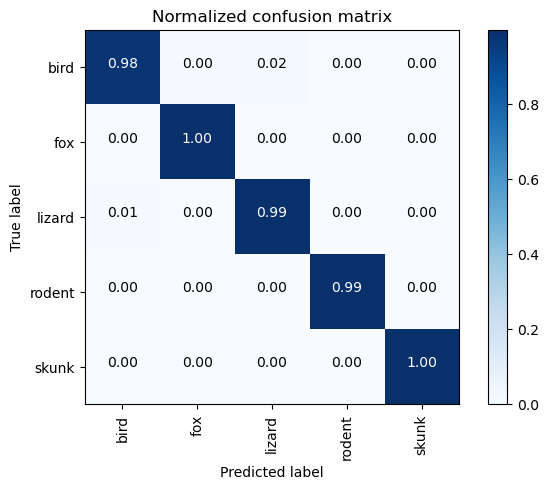

In [85]:
plot_confusion_matrix(train_confusion, df.columns[3:] , normalize=True,
                        title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[0.88313539 0.06983373 0.03420428 0.00997625 0.00285036]
 [0.01065956 0.98334444 0.         0.00399734 0.00199867]
 [0.04416404 0.00757098 0.94321767 0.00504732 0.        ]
 [0.05598356 0.04468413 0.01489471 0.88084232 0.00359527]
 [0.10614525 0.01117318 0.         0.03910615 0.84357542]]


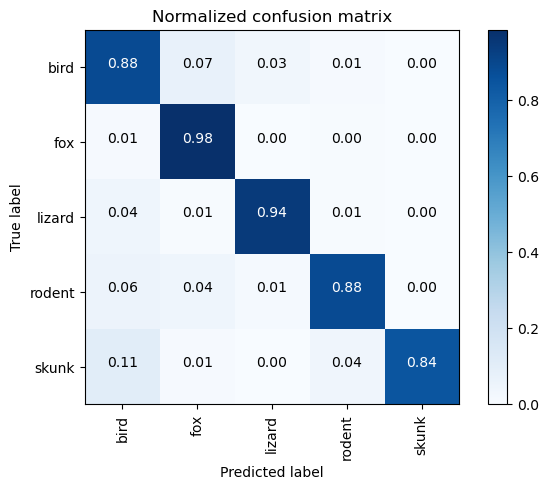

In [86]:
plot_confusion_matrix(val_confusion, df.columns[3:] , normalize=True,
                        title='Normalized confusion matrix')

plt.show()

Normalized confusion matrix
[[9.31796802e-01 2.91627469e-02 2.25776105e-02 1.41110066e-02
  2.35183443e-03]
 [1.57356412e-03 9.96066090e-01 0.00000000e+00 7.86782061e-04
  1.57356412e-03]
 [3.84615385e-02 2.65251989e-02 9.33687003e-01 1.32625995e-03
  0.00000000e+00]
 [2.99032542e-02 1.05540897e-02 2.72647318e-02 9.19964820e-01
  1.23131047e-02]
 [1.34680135e-02 1.01010101e-02 0.00000000e+00 0.00000000e+00
  9.76430976e-01]]


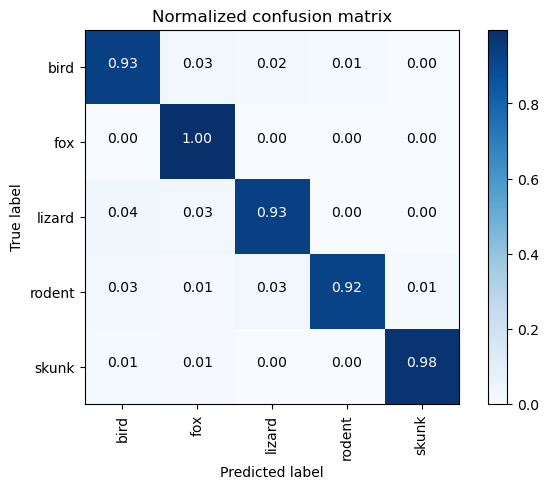

In [87]:
plot_confusion_matrix(test_confusion, df.columns[3:] , normalize=True,
                        title='Normalized confusion matrix')

plt.show()

It's worth noting that the confusion matrix doesn't tell the whole story about the performance of a classification model, as different misclassifications may have different implications depending on the specific problem. Additionally, it's always a good practice to look at other metrics such as precision, recall, and F1-score, to get a more complete picture of the model's performance.

In [97]:
# among all the true positives, how many are correctly classified
tpr = np.diag(train_confusion) / np.sum(train_confusion, axis = 1) # true positive rate = tp / (tp + fn) <- recall  
tpr 

# among all the false positives, how many are incorrectly classified
fpr = np.sum(train_confusion, axis = 0) - np.diag(train_confusion) # false positive rate = fp / (fp + tn) <- fall-out
fpr = fpr / np.sum(train_confusion, axis = 0)
fpr

# among all the false negatives, how many are incorrectly classified
fnr = np.sum(train_confusion, axis = 1) - np.diag(train_confusion) # false negative rate = fn / (fn + tp) <- miss rate
fnr = fnr / np.sum(train_confusion, axis = 1)
fnr

# among all the true negatives, how many are correctly classified
tnr = np.sum(train_confusion) - (np.sum(train_confusion, axis = 0) + np.sum(train_confusion, axis = 1) - np.diag(train_confusion)) # true negative rate = tn / (tn + fp) <- specificity
tnr = tnr / (np.sum(train_confusion) - np.sum(train_confusion, axis = 1))
tnr

# among all the true positives and false positives, how many are correctly classified
ppv = np.diag(train_confusion) / np.sum(train_confusion, axis = 0) # positive predictive value = tp / (tp + fp) <- precision
ppv


array([0.99610769, 0.99196236, 0.96953348, 0.99770379, 0.96861626])

In [142]:
def precision_recall(confusion_matrix):
    # precision = tp / (tp + fp)
    # recall = tp / (tp + fn)
    # f1 = 2 * (precision * recall) / (precision + recall)
    # https://en.wikipedia.org/wiki/Precision_and_recall
    # https://en.wikipedia.org/wiki/F1_score
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)  # true positive rate = tp / (tp + fp) <- precision
    TP_rate = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1) # true positive rate = tp / (tp + fn) <- recall
    FP_rate = np.sum(confusion_matrix, axis = 0) - np.diag(confusion_matrix) # false positive rate = fp / (fp + tn) <- fall-out
    f1 = 2 * (precision * TP_rate) / (precision + TP_rate) # f1 = 2 * (precision * recall) / (precision + recall)
    return precision, TP_rate, FP_rate, f1

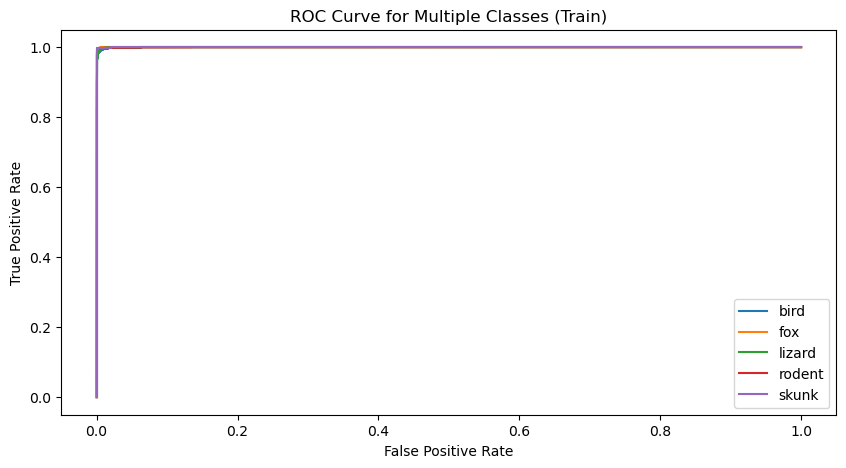

In [109]:

# plot the ROC curve for multiple classes
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve
plt.figure(figsize=(10, 5))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(df_train['label'], df_train.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
    plt.plot(fpr, tpr, label = classes[i])

# plot the ROC curve using matplotlib
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Classes (Train)')
plt.legend()
plt.show()

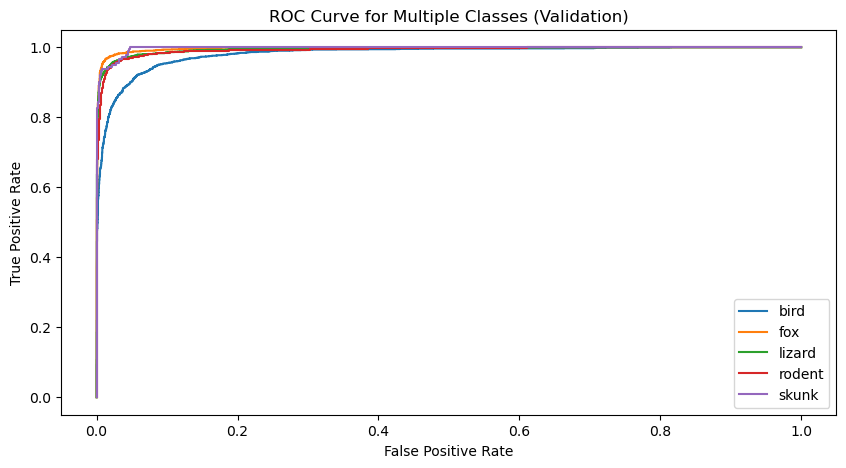

In [108]:

# plot the ROC curve for multiple classes
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve
plt.figure(figsize=(10, 5))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(df_val['label'], df_val.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
    plt.plot(fpr, tpr, label = classes[i])
# plot the ROC curve using matplotlib
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Classes (Validation)')
plt.legend()
plt.show()


In [158]:

def ROC_curve(thresholds, data, classes):
    tpr = [1]
    fpr = [1]
    for i in thresholds:
        confusion_matrix_ = confusion_matrix(data['pred'], data['label'])
        
        precision, TP_rate, FP_rate, f1 = precision_recall(confusion_matrix_)
        tpr.append(TP_rate)
        fpr.append(FP_rate)

        
    from sklearn.metrics import roc_curve
    plt.figure(figsize=(10, 5))
    auc_score = []
    for i in range(len(classes)):
        
        fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
        plt.plot(fpr, tpr, label = classes[i])
        auc = 0
        for i in range(len(tpr)-1):
            auc += (tpr[i] + tpr[i+1]) * (fpr[i+1] - fpr[i]) / 2
        auc_score.append(auc)

    # plot the ROC curve using matplotlib
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Classes (Validation)')
    plt.legend()
    plt.show()

    #calculate AUC area under curve for each class
    # from sklearn.metrics import auc
    # auc = []
    # for i in range(len(classes)):
    #     fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
    #     auc.append(auc(fpr, tpr))
    
    # print the AUC score for each class
    for i in range(len(classes)):
        print('AUC for class {} is {}'.format(classes[i], auc_score[i]))
    return auc_score


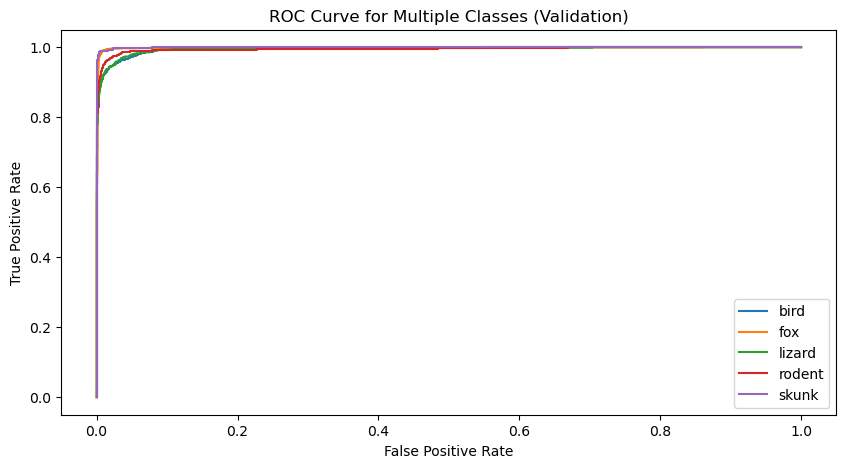

AUC for class bird is 0.9947280125855461
AUC for class fox is 0.9985108772528795
AUC for class lizard is 0.9948344978860695
AUC for class rodent is 0.994953943120057
AUC for class skunk is 0.9993516503655244


[0.9947280125855461,
 0.9985108772528795,
 0.9948344978860695,
 0.994953943120057,
 0.9993516503655244]

In [160]:
ROC_curve(np.arange(0, 1, 0.01), df_test, classes)

In [133]:
df_train.iloc[:, 3:-1].iloc[:, 1]

0        1.000000e+00
1        1.000000e+00
2        1.000000e+00
3        1.000000e+00
4        1.933244e-03
             ...     
19469    4.340715e-10
19470    9.384663e-11
19471    6.579639e-11
19472    2.241897e-07
19473    6.886036e-08
Name: fox, Length: 19474, dtype: float64

In [110]:
classes_combinations = []
class_list = list(classes)
for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        classes_combinations.append([class_list[i], class_list[j]])
        classes_combinations.append([class_list[j], class_list[i]])

In [111]:
classes_combinations

[['bird', 'fox'],
 ['fox', 'bird'],
 ['bird', 'lizard'],
 ['lizard', 'bird'],
 ['bird', 'rodent'],
 ['rodent', 'bird'],
 ['bird', 'skunk'],
 ['skunk', 'bird'],
 ['fox', 'lizard'],
 ['lizard', 'fox'],
 ['fox', 'rodent'],
 ['rodent', 'fox'],
 ['fox', 'skunk'],
 ['skunk', 'fox'],
 ['lizard', 'rodent'],
 ['rodent', 'lizard'],
 ['lizard', 'skunk'],
 ['skunk', 'lizard'],
 ['rodent', 'skunk'],
 ['skunk', 'rodent']]

In [112]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [113]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [115]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

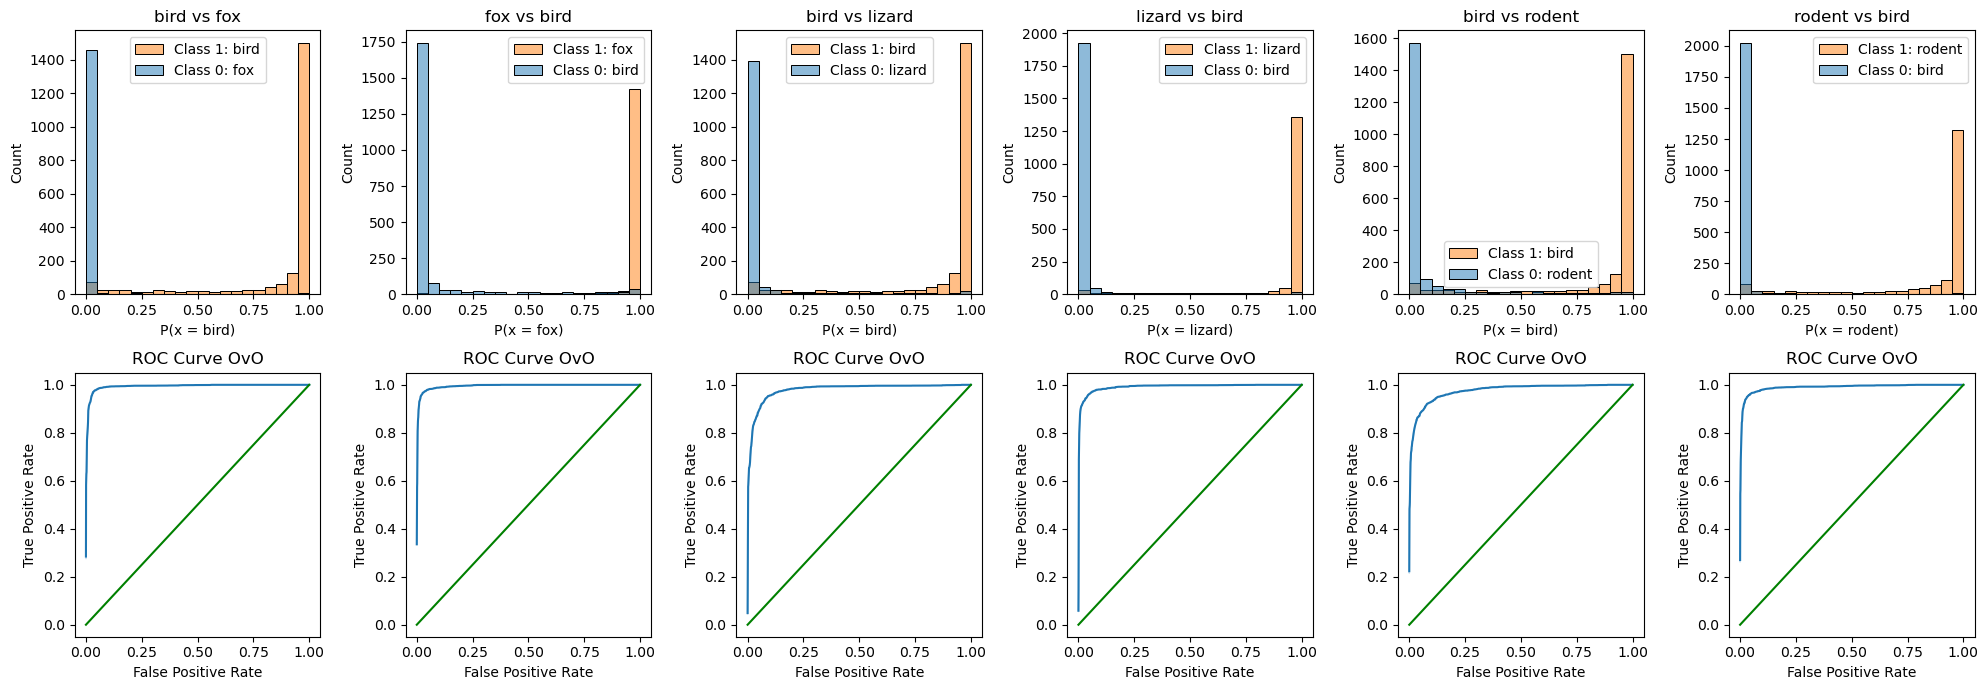

In [125]:
from sklearn.metrics import roc_auc_score

# Plots the Probability Distributions and the ROC Curves One vs One
plt.figure(figsize = (20, 7))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovo = {}
for i in range(len(classes_combinations[:6])):
    # Gets the class
    comb = classes_combinations[i]
    c1 = comb[0]
    c2 = comb[1]
    c1_index = class_list.index(c1)
    title = c1 + " vs " +c2
    
    # Prepares an auxiliar dataframe to help with the plots
    df_aux = df_val.copy()
    df_aux['class'] = df_aux['label']
    df_aux['prob'] = df_aux.iloc[:, 3:-1].iloc[:, c1_index]
    
    # Slices only the subset with both classes
    df_aux = df_aux[(df_aux['class'] == c1) | (df_aux['class'] == c2)]
    df_aux['class'] = [1 if y == c1 else 0 for y in df_aux['class']]
    df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 6, i+1)
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(title)
    ax.legend([f"Class 1: {c1}", f"Class 0: {c2}"])
    ax.set_xlabel(f"P(x = {c1})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 6, i+7)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvO")
    
    # Calculates the ROC AUC OvO
    roc_auc_ovo[title] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()


### Checkpoint 1

In [164]:
model1 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": False,
 "model_name": "efficientnet-b3",
 "pretrained": True,
 "finetune": 0,
 "label_weighted": True,
 "weight_by_detection_conf": False,
 "epochs": 50,
 "batch_size": 80,
 "lr": 3e-05,
 "weight_decay": 1e-06,
 "num_workers": 4,
 "logdir": ".",
 "log_extreme_examples": 0,
 "seed": 1176
}

In [ ]:
model2 = {
 "dataset_dir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR",
 "cropped_images_dir": "/home/wliao14/crops",
 "multilabel": False,
 "model_name": "efficientnet-b3",
 "pretrained": True,
 "finetune": 0,
 "label_weighted": True,
 "weight_by_detection_conf": False,
 "epochs": 60,
 "batch_size": 50,
 "lr": 3e-05,
 "weight_decay": 0.0001,
 "num_workers": 4,
 "logdir": "/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch_size_parameters/60",
 "log_extreme_examples": 3,
 "seed": 5878
}

In [182]:
df_model1 = np.load("/home/wliao14/animl-implement/result/0222/20230222_021024/confusion_matrices.npz")
df_model1_train, df_model1_val, df_model1_test = df_model1['train'], df_model1['val'], df_model1['test']

# read in the data 
df_model2 = np.load("/home/wliao14/CameraTraps/classification/BASE_LOGDIR/batch-size80/20230306_200710/confusion_matrices.npz")
df_model2_train, df_model2_val, df_model2_test = df_model2['train'], df_model2['val'], df_model2['test']


In [217]:
# calculate the precision and recall for each class 
confusion_matrix = df_model2_val

precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1)
fpr = np.sum(confusion_matrix, axis = 0) - np.diag(confusion_matrix)
fpr = fpr / np.sum(confusion_matrix, axis = 0)
fpr = 1 - fpr
f1 = 2 * (precision * recall) / (precision + recall)
f1

array([0.77440567, 0.8399546 , 0.91204819, 0.8722063 , 0.86127168])

In [218]:
def precision_recall(confusion_matrix):
    # precision = tp / (tp + fp)
    # recall = tp / (tp + fn)
    # f1 = 2 * (precision * recall) / (precision + recall)
    # https://en.wikipedia.org/wiki/Precision_and_recall
    # https://en.wikipedia.org/wiki/F1_score
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)  # true positive rate = tp / (tp + fp) <- precision
    TP_rate = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1) # true positive rate = tp / (tp + fn) <- recall
    FP_rate = np.sum(confusion_matrix, axis = 0) - np.diag(confusion_matrix)
    FP_rate = FP_rate / np.sum(confusion_matrix, axis = 0)
    FP_rate = 1 - FP_rate
    f1 = 2 * (precision * TP_rate) / (precision + TP_rate) # f1 = 2 * (precision * recall) / (precision + recall)
    return precision, TP_rate, FP_rate, f1

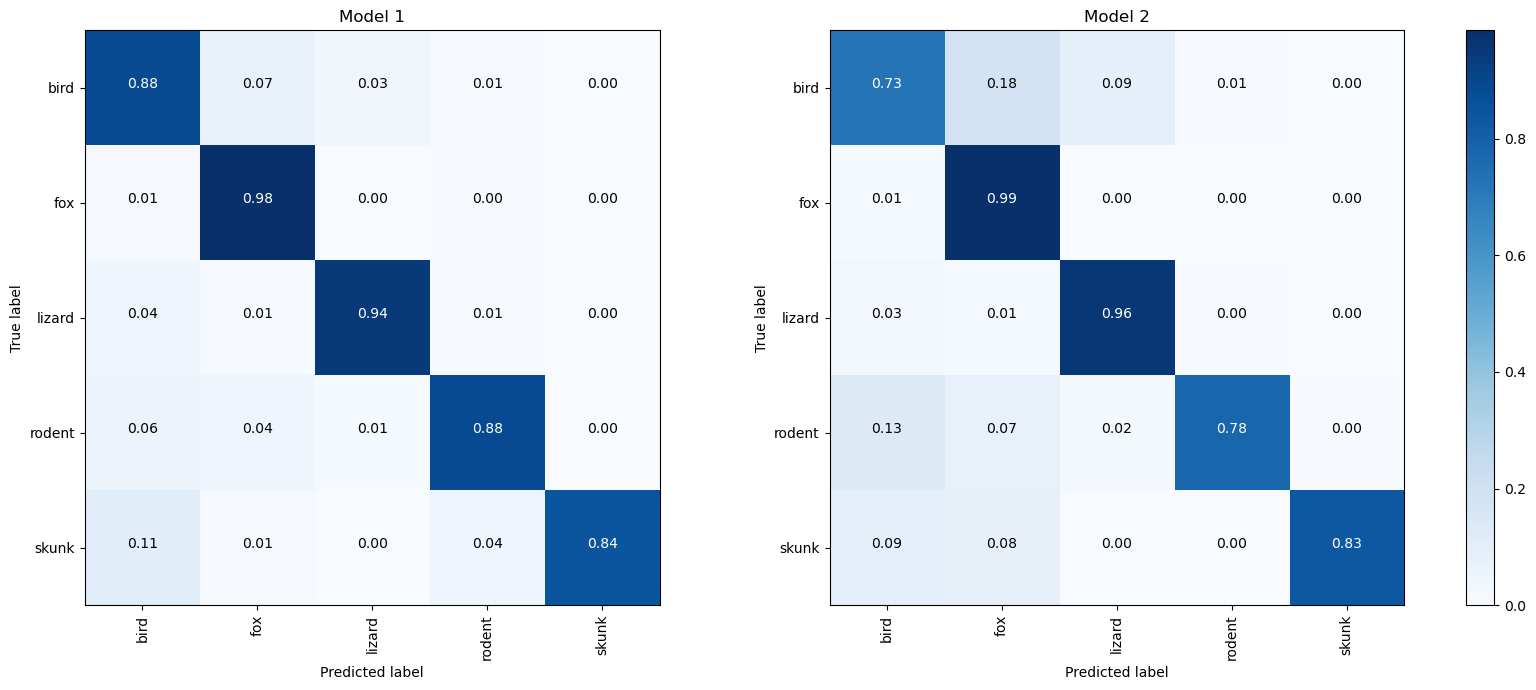

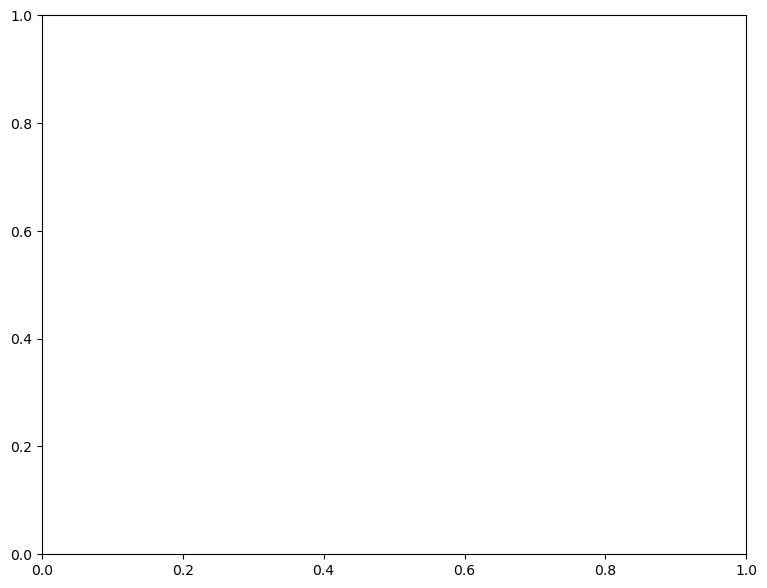

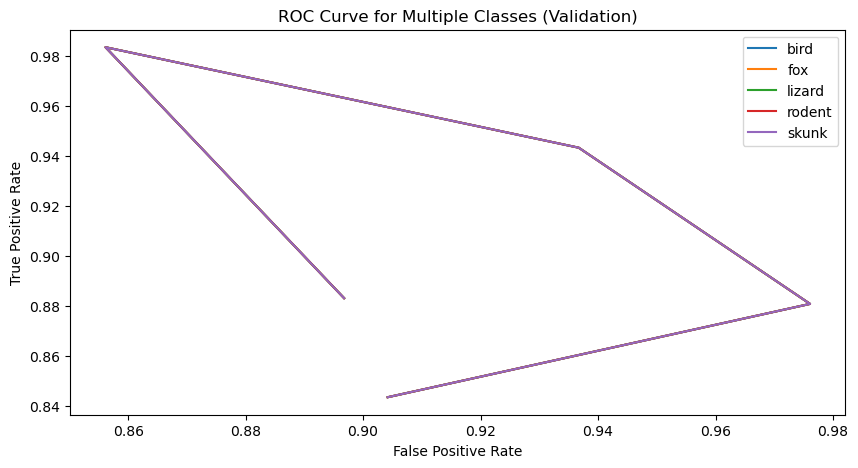

AUC for class bird is 0.013620602099643254
AUC for class fox is 0.013620602099643254
AUC for class lizard is 0.013620602099643254
AUC for class rodent is 0.013620602099643254
AUC for class skunk is 0.013620602099643254


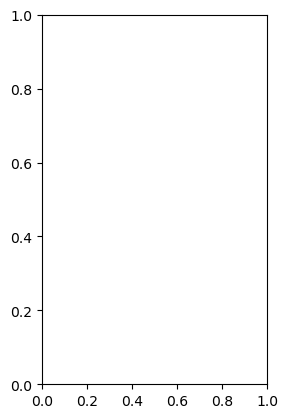

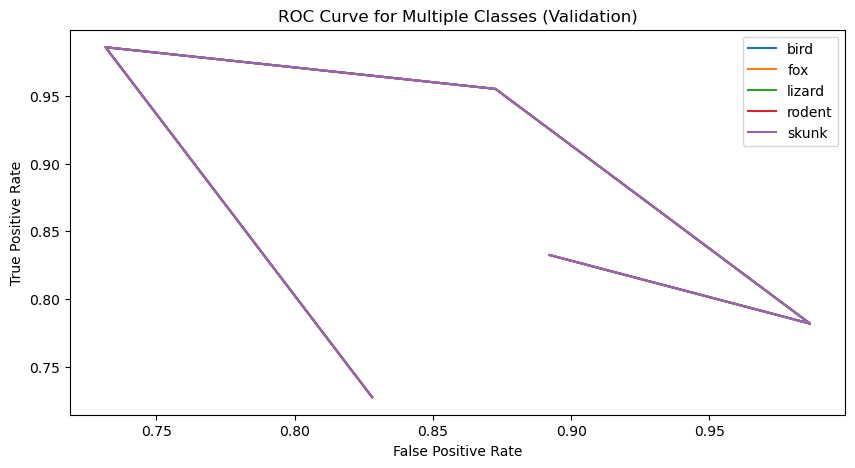

AUC for class bird is 0.07708196320402065
AUC for class fox is 0.07708196320402065
AUC for class lizard is 0.07708196320402065
AUC for class rodent is 0.07708196320402065
AUC for class skunk is 0.07708196320402065


<Figure size 640x480 with 0 Axes>

In [221]:
### Checkpoint 1
### compare mutilple models with different hyperparameters
### compare the performance of the models on the validation set
from matplotlib.artist import Artist

# plot the confusion matrix
plt.figure(figsize = (20, 7))
ax = plt.subplot(1, 2, 1)
plot_confusion_matrix(df_model1_val, classes=classes, normalize=True ,title = "Model 1")
ax = plt.subplot(1, 2, 2)
plot_confusion_matrix(df_model2_val, classes=classes, normalize=True,title = "Model 2")
plt.tight_layout()

plt.show();

# plot the ROC curves
plt.figure(figsize = (20, 7))
ax = plt.subplot(1, 2, 1)
ROC_curve(df_model1_val, classes=classes)
ax = plt.subplot(1, 2, 2)
ROC_curve(df_model2_val, classes=classes)
plt.tight_layout()
plt.show();


In [204]:
df_model1_val 

array([[1859,  147,   72,   21,    6],
       [  16, 1476,    0,    6,    3],
       [  70,   12, 1495,    8,    0],
       [ 109,   87,   29, 1715,    7],
       [  19,    2,    0,    7,  151]])

In [220]:
def ROC_curve(data, classes):
    tpr = [1]
    fpr = [1]
    for i in np.arange(0, 1, 0.01):        
        _, TP_rate, FP_rate, _ = precision_recall(data)
        tpr.append(TP_rate)
        fpr.append(FP_rate)

    from sklearn.metrics import roc_curve
    plt.figure(figsize=(10, 5))
    auc_score = []
    for i in range(len(classes)):
        _, TP_rate, FP_rate, _ = precision_recall(data)
        plt.plot(FP_rate, TP_rate, label = classes[i])
        auc = 0
        for i in range(len(TP_rate)-1):
            auc += (TP_rate[i] + TP_rate[i+1]) * (FP_rate[i+1] - FP_rate[i]) / 2
        auc_score.append(auc)
    
    # plot the ROC curve using matplotlib
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Classes (Validation)')
    plt.legend()
    plt.show();

    
    # print the AUC score for each class
    for i in range(len(classes)):
        print('AUC for class {} is {}'.format(classes[i], auc_score[i]))
    return auc_score



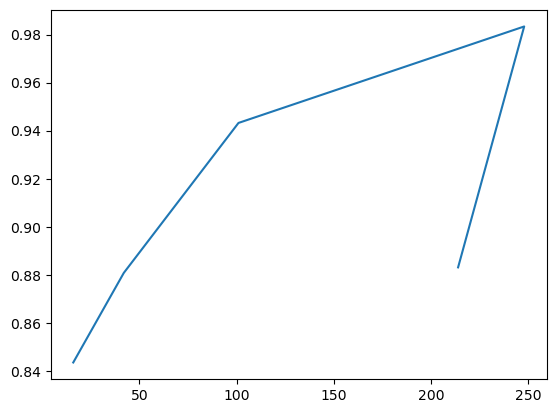

In [213]:
_, TP_rate, FP_rate, _  = precision_recall(df_model1_val)
plt.plot(FP_rate, TP_rate, label = classes[0])

In [ ]:

def ROC_curve(thresholds, data, classes):
    tpr = [1]
    fpr = [1]
    for i in thresholds:
        confusion_matrix_ = confusion_matrix(data['pred'], data['label'])
        
        precision, TP_rate, FP_rate, f1 = precision_recall(confusion_matrix_)
        tpr.append(TP_rate)
        fpr.append(FP_rate)

        
    from sklearn.metrics import roc_curve
    plt.figure(figsize=(10, 5))
    auc_score = []
    for i in range(len(classes)):
        
        fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
        plt.plot(fpr, tpr, label = classes[i])
        auc = 0
        for i in range(len(tpr)-1):
            auc += (tpr[i] + tpr[i+1]) * (fpr[i+1] - fpr[i]) / 2
        auc_score.append(auc)

    # plot the ROC curve using matplotlib
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multiple Classes (Validation)')
    plt.legend()
    plt.show()

    #calculate AUC area under curve for each class
    # from sklearn.metrics import auc
    # auc = []
    # for i in range(len(classes)):
    #     fpr, tpr, _ = roc_curve(data['label'], data.iloc[:, 3:-1].iloc[:, i], pos_label = classes[i])
    #     auc.append(auc(fpr, tpr))
    
    # print the AUC score for each class
    for i in range(len(classes)):
        print('AUC for class {} is {}'.format(classes[i], auc_score[i]))
    return auc_score
